In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import argparse
import gzip
import os
import sys
import time
from six.moves import urllib

import mnist_common as cmm

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('/home/mhkim/data/mnist', one_hot=True)

train_checkpoint = '/home/mhkim/data/checkpoint/mnist_cnn/save.ckpt'

SOURCE_URL = 'http://yann.lecun.com/exdb/mnist/'
WORK_DIRECTORY = '/home/mhkim/data/mnist'

IMAGE_SIZE = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10
VALIDATION_SIZE = 5000
SEED = 66478
BATCH_SIZE = 64
NUM_EPOCHS = 10
EVAL_FREQUENCY = 100  # Number of steps between evaluations.
EVAL_BATCH_SIZE = 64

test_data_filename = cmm.maybe_download('t10k-images-idx3-ubyte.gz')
test_labels_filename = cmm.maybe_download('t10k-labels-idx1-ubyte.gz')

test_data = cmm.extract_data(test_data_filename, 1)
test_labels = cmm.extract_labels(test_labels_filename, 1)

eval_data = tf.placeholder( tf.float32, shape=(1, IMAGE_SIZE, IMAGE_SIZE, NUM_CHANNELS), name='eval_data')

W1 = tf.Variable(tf.truncated_normal([5, 5, NUM_CHANNELS, 32], stddev=0.1, seed=SEED, dtype=tf.float32), name='W1')
W2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=SEED, dtype=tf.float32), name='W2')

b1 = tf.Variable(tf.zeros([32], dtype=tf.float32), name='bias1')
b2 = tf.Variable(tf.constant(0.1, shape=[64], dtype=tf.float32), name='bias2')

fc1_weight = tf.Variable( tf.truncated_normal([IMAGE_SIZE // 4 * IMAGE_SIZE // 4 * 64, 512], stddev=0.1, seed=SEED, dtype=tf.float32), name='fc1_weight')
fc1_bias = tf.Variable(tf.constant(0.1, shape=[512], dtype=tf.float32), name='fc1_bias')

fc2_weight = tf.Variable(tf.truncated_normal([512, NUM_LABELS], stddev=0.1, seed=SEED, dtype=tf.float32), name='fc2_weight')
fc2_bias = tf.Variable(tf.constant(0.1, shape=[NUM_LABELS], dtype=tf.float32), name='fc2_bias')

with tf.name_scope('model'):
    conv = tf.nn.conv2d(eval_data, W1, strides=[1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, b1), name='relu1')
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    conv = tf.nn.conv2d(pool, W2, strides=[1, 1, 1, 1], padding='SAME')
    relu = tf.nn.relu(tf.nn.bias_add(conv, b2))
    pool = tf.nn.max_pool(relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    pool_shape = pool.get_shape().as_list()

    reshape = tf.reshape(pool, [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])

    hidden = tf.nn.dropout(tf.nn.relu(tf.matmul(reshape, fc1_weight) + fc1_bias), 1., seed=SEED)

    logits = tf.matmul(hidden, fc2_weight) + fc2_bias

eval_prediction = tf.nn.softmax(logits)

sess = tf.InteractiveSession()

init = tf.global_variables_initializer()

sess.run(init)

saver = tf.train.Saver()

saver.restore(sess, train_checkpoint)

Extracting /home/mhkim/data/mnist/train-images-idx3-ubyte.gz
Extracting /home/mhkim/data/mnist/train-labels-idx1-ubyte.gz
Extracting /home/mhkim/data/mnist/t10k-images-idx3-ubyte.gz
Extracting /home/mhkim/data/mnist/t10k-labels-idx1-ubyte.gz


In [6]:
inputForm = ''
with open('mnist_nn_input.template', 'r') as f :
    for line in f.readlines() :
        inputForm += line

from IPython.display import HTML
HTML(inputForm)

[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0]]
[[0], [0], [0

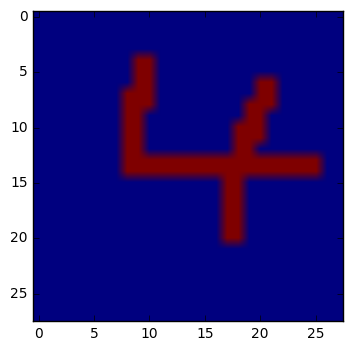

In [7]:
imageBuff = []
imageBuff_p = []
index = 0
for i in range(28) :
    _row = []
    _row_p = []
    for j in range(28) :
        _cell = image[index]
        index = index + 1
        if _cell < 1 :
            _cell = 0
        else :
            _cell = 1
        _row.append([_cell])
        _row_p.append(_cell)
    imageBuff.append(_row)
    imageBuff_p.append(_row_p)
    print ( _row)

plt.imshow ( imageBuff_p )
plt.show()

In [8]:
result = tf.argmax(eval_prediction, 1)
print ( result.eval({eval_data: [imageBuff]}) )

[4]


In [ ]:
sess.close()